## 🌟 Level Up: Exploring More Neurons!

Now that we understand how two neurons work together, let's try something more exciting - a network with more neurons! 
We'll create some fun patterns and see how our network remembers them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

### 🎨 First, Let's Create Some Fun Patterns!
We'll make simple patterns that our network can learn and remember.

In [2]:
def create_letter_pattern(letter):
    """
    Creates patterns in the shape of letters or symbols
    Each pattern is a 5x5 grid where 1 is filled and -1 is empty
    """
    patterns = {
        'X': np.array([
            [ 1, -1, -1, -1,  1],
            [-1,  1, -1,  1, -1],
            [-1, -1,  1, -1, -1],
            [-1,  1, -1,  1, -1],
            [ 1, -1, -1, -1,  1]
        ]),
        'O': np.array([
            [-1,  1,  1,  1, -1],
            [ 1, -1, -1, -1,  1],
            [ 1, -1, -1, -1,  1],
            [ 1, -1, -1, -1,  1],
            [-1,  1,  1,  1, -1]
        ]),
        '+': np.array([
            [-1, -1,  1, -1, -1],
            [-1, -1,  1, -1, -1],
            [ 1,  1,  1,  1,  1],
            [-1, -1,  1, -1, -1],
            [-1, -1,  1, -1, -1]
        ])
    }
    return patterns.get(letter)

### 🧮 Now Let's Create Our Advanced Network!

In [3]:
class AdvancedHopfieldNetwork:
    """
    A more advanced Hopfield Network that can learn and remember patterns
    """
    def __init__(self, size):
        """Initialize our network with a given size"""
        self.size = size
        self.weights = np.zeros((size, size))
    
    def train(self, patterns):
        """Teach our network to remember patterns"""
        # Reset weights
        self.weights = np.zeros((self.size, self.size))
        
        # Learn each pattern
        for pattern in patterns:
            flat_pattern = pattern.flatten()
            # Update weights using Hebbian learning
            self.weights += np.outer(flat_pattern, flat_pattern)
        
        # Remove self-connections
        np.fill_diagonal(self.weights, 0)
        
        # Normalize weights
        self.weights /= len(patterns)
    
    def update(self, state):
        """Update the network state"""
        # Flatten the state
        flat_state = state.flatten()
        # Calculate new state
        new_state = np.sign(self.weights @ flat_state)
        # Reshape back to original shape
        return new_state.reshape(state.shape)
    
    def run(self, initial_state, max_iterations=20):
        """Run the network until it stabilizes or reaches max iterations"""
        state = initial_state.copy()
        states_history = [state.copy()]
        
        for _ in range(max_iterations):
            new_state = self.update(state)
            if np.array_equal(new_state, state):
                break
            state = new_state
            states_history.append(state.copy())
        
        return state, states_history

### 📊 Let's Create Some Nice Visualization Functions!

In [4]:
def plot_pattern(pattern, title="Pattern"):
    """Show a single pattern with a nice colormap"""
    plt.imshow(pattern, cmap='coolwarm')
    plt.title(title)
    plt.axis('off')
    plt.colorbar(label='Neuron State')

def plot_patterns(patterns, titles):
    """Show multiple patterns side by side"""
    fig, axes = plt.subplots(1, len(patterns), figsize=(4*len(patterns), 4))
    if len(patterns) == 1:
        axes = [axes]
    
    for ax, pattern, title in zip(axes, patterns, titles):
        ax.imshow(pattern, cmap='coolwarm')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def animate_network_evolution(states_history):
    """Show how the network evolves over time"""
    for i, state in enumerate(states_history):
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(state, cmap='coolwarm')
        plt.title(f'Step {i}')
        plt.axis('off')
        plt.colorbar(label='Neuron State')
        plt.show()
        time.sleep(0.5)

### 🚀 Let's Try Our Advanced Network!

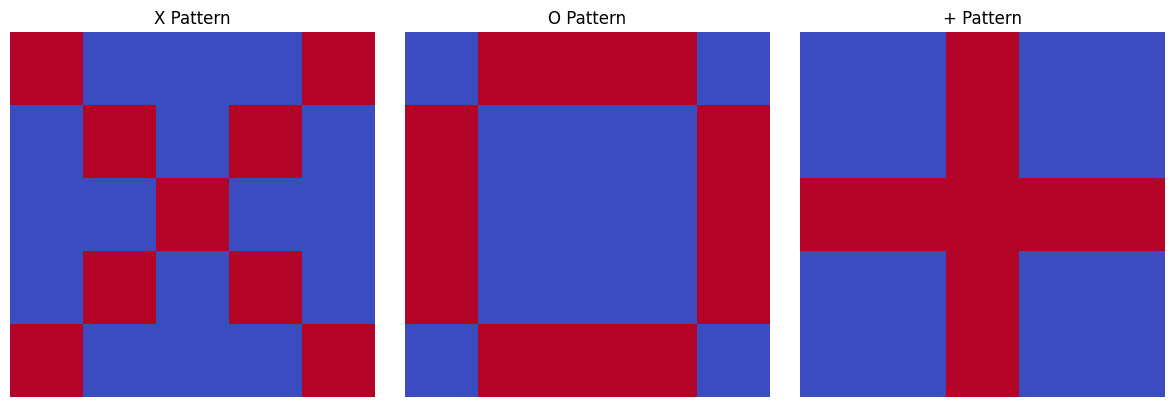

In [5]:
# Create our training patterns
pattern_X = create_letter_pattern('X')
pattern_O = create_letter_pattern('O')
pattern_plus = create_letter_pattern('+')

# Show our training patterns
plot_patterns([pattern_X, pattern_O, pattern_plus], ['X Pattern', 'O Pattern', '+ Pattern'])

### 🎓 Train Our Network

In [6]:
# Create and train our network
network = AdvancedHopfieldNetwork(25)  # 5x5 = 25 neurons
network.train([pattern_X.flatten(), pattern_O.flatten(), pattern_plus.flatten()])

### 🎮 Let's Test Our Network!
We'll create a noisy pattern and see if our network can clean it up.

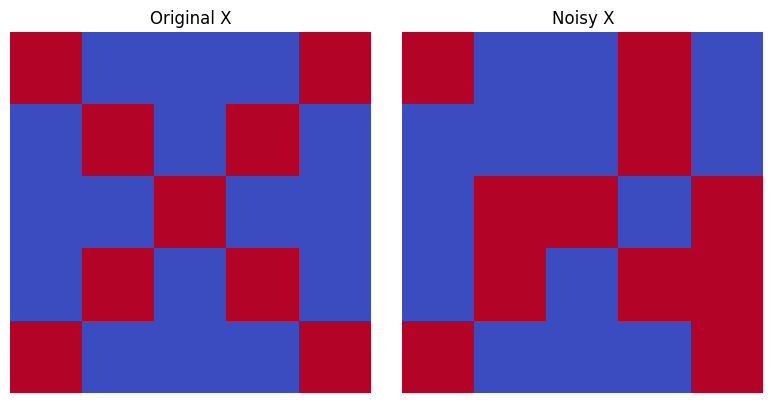

In [7]:
def add_noise(pattern, noise_level=0.2):
    """Add some random noise to our pattern"""
    noisy = pattern.copy()
    mask = np.random.random(pattern.shape) < noise_level
    noisy[mask] *= -1
    return noisy

# Create a noisy version of X
noisy_X = add_noise(pattern_X)

# Show original and noisy patterns
plot_patterns([pattern_X, noisy_X], ['Original X', 'Noisy X'])

### 🔄 Watch The Network Fix The Pattern!

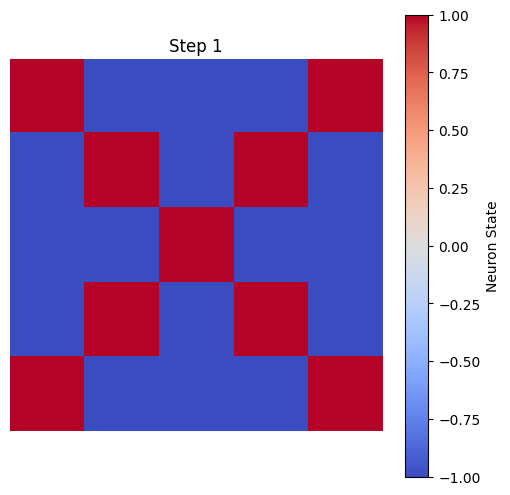

In [8]:
# Try to recover the original pattern
recovered, history = network.run(noisy_X)

# Animate the recovery process
animate_network_evolution(history)

### 🎯 Final Result

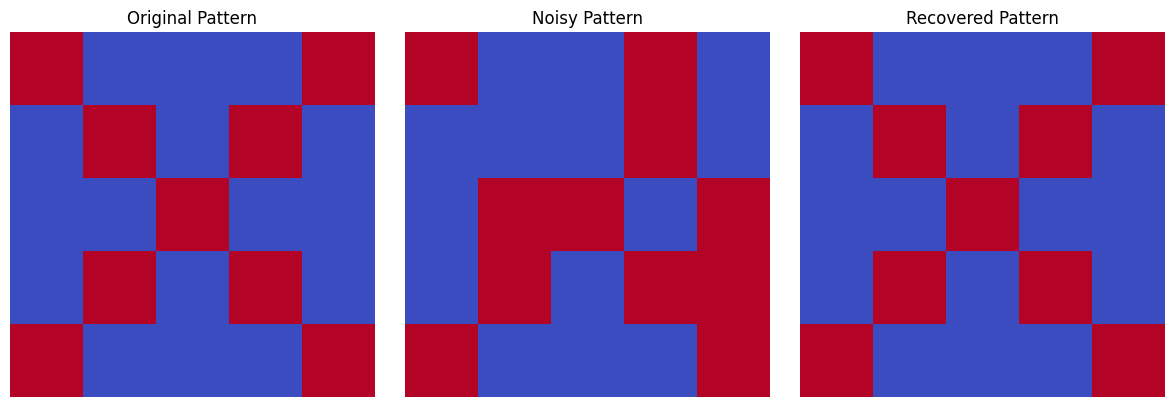

In [9]:
# Show the final comparison
plot_patterns([pattern_X, noisy_X, recovered], 
             ['Original Pattern', 'Noisy Pattern', 'Recovered Pattern'])

### 🤓 Fun Experiments to Try:

1. **Change the Noise Level**: 
   - Try different noise_level values in add_noise()
   - What's the maximum noise the network can handle?

2. **Create Your Own Patterns**:
   - Add new patterns to the create_letter_pattern function
   - Try teaching the network more patterns

3. **Watch Recovery**:
   - Try different noisy patterns
   - See how the network recovers them

4. **Experiment with Size**:
   - Try making the grid bigger or smaller
   - How does this affect the network's memory?

### 📚 What Did We Learn?

1. Our network can now:
   - Remember multiple patterns
   - Clean up noisy or incomplete patterns
   - Show us how it thinks step by step

2. Just like our two-neuron network:
   - It still tries to find comfortable states
   - It helps neurons work together
   - It can recover memories (patterns) even when they're messy!

3. This is similar to how our brains:
   - Remember patterns
   - Complete partial information
   - Clean up noisy memories